<a href="https://colab.research.google.com/github/albernazz/recomenda-o-por-imagens-/blob/main/recomendacao_por_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
import requests

import matplotlib.pyplot as plt
import urllib
from io import BytesIO
from PIL import Image

# Carregar o modelo pré-treinado MobileNet
model = MobileNet(weights='imagenet')

# Função para carregar e preparar a imagem
def prepare_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte de BGR (OpenCV) para RGB
    img = cv2.resize(img, (224, 224))  # Redimensiona para 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Função para prever a categoria da imagem
def classify_image(img_path):
    img_array = prepare_image(img_path)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}. {label} ({score:.2f})")

    # Retorna o nome da categoria mais provável
    return decoded_predictions[0][1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1. warplane (1.00)
2. airliner (0.00)
3. space_shuttle (0.00)


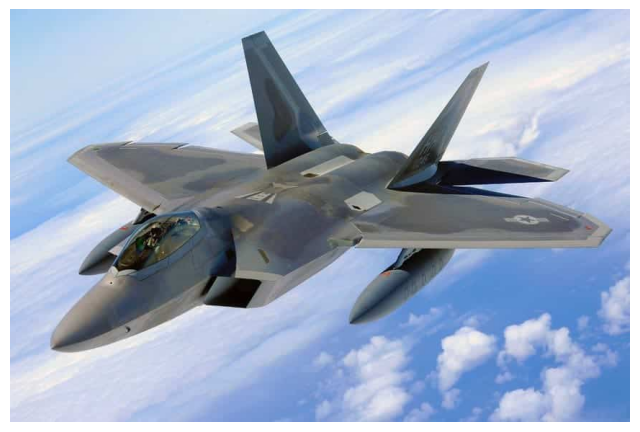

In [39]:
img_path = '/content/message-editor_1535675811369-f-22-tanks.jpg'
category = classify_image(img_path)

img = Image.open(img_path)

# Exibe a imagem usando matplotlib
plt.figure(figsize=(8, 8))  # Tamanho da figura
plt.imshow(img)  # Exibe a imagem
plt.axis('off')  # Desliga os eixos para não mostrar as bordas
plt.show()  # Exibe a imagem na tela

In [34]:
def search_images_pexels(query):
    api_key = 'oPwKmXcYEwwGevV5pzE8qjEIxY3iYUtvhaH22H2xHsTwsv6Mg0Fbraau'  # Coloque sua chave da API do Pexels aqui
    url = f'https://api.pexels.com/v1/search?query={query}&per_page=3'
    headers = {'Authorization': api_key}
    response = requests.get(url, headers=headers)
    data = response.json()

    # Retorna as URLs das imagens
    images = [img['src']['large'] for img in data['photos']]
    return images

# Busca de imagens relacionadas à categoria
image_urls = search_images_pexels(category)
print("Imagens relacionadas:")

lista_url = []

for url in image_urls:
    lista_url.append(url)
    print(url)

Imagens relacionadas:
https://images.pexels.com/photos/30732151/pexels-photo-30732151.jpeg?auto=compress&cs=tinysrgb&h=650&w=940
https://images.pexels.com/photos/40907/sunrise-sky-clouds-sun-40907.jpeg?auto=compress&cs=tinysrgb&h=650&w=940
https://images.pexels.com/photos/1405827/pexels-photo-1405827.jpeg?auto=compress&cs=tinysrgb&h=650&w=940


Gráfico de imagens:


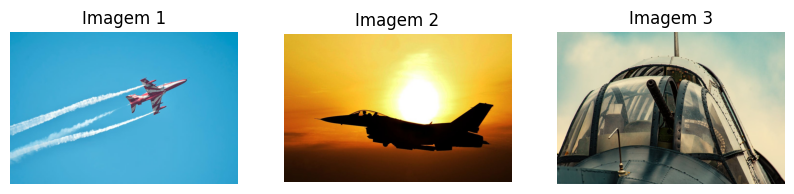

In [35]:
def plot_images(image_urls):
    plt.figure(figsize=(10, 10))  # Define o tamanho da figura para exibir várias imagens
    for i, url in enumerate(image_urls):
        response = requests.get(url)  # Faz o download da imagem
        img = Image.open(BytesIO(response.content))  # Converte o conteúdo da imagem em um objeto de imagem

        # Adiciona a imagem ao gráfico
        plt.subplot(1, len(image_urls), i + 1)  # Define a posição de cada imagem (1 linha e várias colunas)
        plt.imshow(img)  # Exibe a imagem
        plt.axis('off')  # Desliga os eixos para não mostrar as bordas
        plt.title(f'Imagem {i+1}')  # Adiciona o título para cada imagem

    plt.show()  # Exibe o gráfico com todas as imagens

print("Imagens recomendadas: ")
plot_images(lista_url)